In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
data.iloc[:,1]

0        Male
1        Male
2      Female
3      Female
4      Female
5      Female
6      Female
7      Female
8        Male
9      Female
10       Male
11     Female
12     Female
13     Female
14       Male
15       Male
16     Female
17       Male
18       Male
19     Female
20       Male
21       Male
22     Female
23       Male
24     Female
25       Male
26     Female
27       Male
28     Female
29     Female
        ...  
170      Male
171      Male
172      Male
173      Male
174    Female
175    Female
176      Male
177      Male
178      Male
179      Male
180    Female
181    Female
182      Male
183    Female
184    Female
185      Male
186    Female
187      Male
188    Female
189    Female
190    Female
191    Female
192      Male
193    Female
194    Female
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

In [12]:
x=data.iloc[:,[3,4]].values

In [13]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

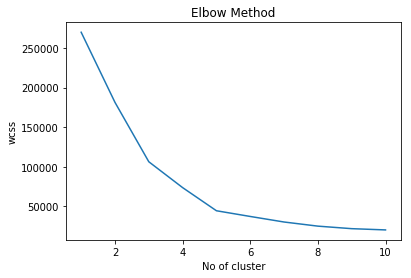

In [14]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init="k-means++",random_state=1).fit(x)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel("No of cluster")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.show()

In [15]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_means=kmeans.fit_predict(x)

In [16]:
y_means==0,0

(array([False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

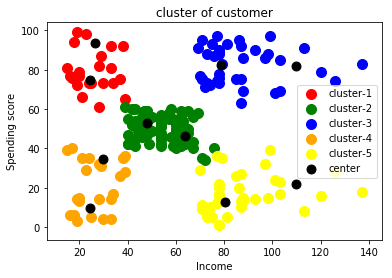

In [17]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='red',label="cluster-1")
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='green',label="cluster-2")
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='blue',label="cluster-3")
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='orange',label="cluster-4")
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=100,c='yellow',label="cluster-5")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=80,c='black',label='center')
plt.xlabel("Income")
plt.ylabel("Spending score")
plt.title("cluster of customer")
plt.legend()
plt.show()

In [24]:
x[y_means==1,0],x[y_means==1,1]

(array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
        47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
        60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
        64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64),
 array([61, 55, 47, 42, 42, 52, 60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55,
        52, 59, 51, 59, 50, 48, 59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52,
        42, 51, 55, 41, 44, 57, 46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52,
        47, 50, 42, 49, 41, 48, 59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42,
        46, 48, 50, 43, 59, 43, 57, 56, 40, 58, 35, 34, 40], dtype=int64))

In [25]:
data['Cluster']=y_means
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [43]:
mask=data["Cluster"]==0
data[mask].head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0


In [40]:
#for i in range(0,5):
 #   mask=data["Cluster"]==i
  #  i+=1
   # print(data[mask])

In [45]:
mask=data["Cluster"]==1
data[mask].head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
43,44,Female,31,39,61,1
46,47,Female,50,40,55,1
47,48,Female,27,40,47,1
48,49,Female,29,40,42,1
49,50,Female,31,40,42,1


TypeError: '(slice(None, None, None), slice(None, 1, None))' is an invalid key